In [1]:
from importlib.machinery import SourceFileLoader
MODULENAME = "loadgaps"
MODULEPATH = "/home/ali/my_project/large_files/gaps/loadgaps.py"
lgaps = SourceFileLoader(MODULENAME, MODULEPATH).load_module()

v2_tr_patch_num = 7 # upto 25
v2_va_patch_num = 2# upto 5
v2_te_patch_num = 2# upto 5
issue_input='ZEB_50k'
patch_size_input = 128

x_train, y_train, x_valid, y_valid, x_test, y_test = lgaps.loadv2(
                                                patch_size_input= patch_size_input,# [64, 96, 128, 160, 192, 224, 256]
                                                issue_input     =issue_input,  # ['NORMvsDISTRESS_50k', 'ZEB_50k']
                                                v2_tr_patch_num = v2_tr_patch_num, # upto 154
                                                v2_va_patch_num = v2_va_patch_num, # upto 7
                                                v2_te_patch_num = v2_te_patch_num  # upto 26
                                                )



loading 1 chunk  out of 7 of training in v2 gaps
loading 2 chunk  out of 7 of training in v2 gaps
loading 3 chunk  out of 7 of training in v2 gaps
loading 4 chunk  out of 7 of training in v2 gaps
loading 5 chunk  out of 7 of training in v2 gaps
loading 6 chunk  out of 7 of training in v2 gaps
loading 7 chunk  out of 7 of training in v2 gaps
loading 1 chunk  out of 2 of valid in v2 gaps
loading 2 chunk  out of 2 of valid in v2 gaps
loading 1 chunk  out of 2 of test in v2 gaps
loading 2 chunk  out of 2 of test in v2 gaps


In [2]:
from tensorflow.keras import utils
if issue_input == 'ZEB_50k':
    num_classes = 6
elif issue_input == 'NORMvsDISTRESS_50k':
    num_classes = 2
else:
    print('enter valid issue input')

y_train = utils.to_categorical(y_train, num_classes)
y_valid = utils.to_categorical(y_valid, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [3]:
shape_input = x_train[0,:,:,:].shape
print(f'input shape  : {shape_input}')
print(f'train num is : {y_train.shape[0]}')
print(f'valid num is : {y_valid.shape[0]}')
print(f'test  num is : {y_test.shape[0]}')

input shape  : (1, 128, 128)
train num is : 50000
valid num is : 10000
test  num is : 10000


In [4]:
import readmodel
#model = readmodel.modelchoose( 'model_4', (256, 256, 3), 6)
model = readmodel.modelchoose( 'model_5', shape_input, num_classes)
model.summary()

add first channel
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 126, 126)      320       
_________________________________________________________________
activation (Activation)      (None, 32, 126, 126)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 124, 32)       36320     
_________________________________________________________________
activation_1 (Activation)    (None, 30, 124, 32)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 62, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15

In [5]:
# initiate RMSprop optimizer
#from tensorflow import keras
#opt = keras.optimizers.RMSprop(learning_rate=0.01,momentum=0.7, decay=1e-6)
if num_classes == 2:
    loss = 'binary_crossentropy'
if num_classes == 6:
    loss = 'categorical_crossentropy'
    
print(loss)

#model.compile( loss = loss, # loss='categorical_crossentropy',
#              optimizer=opt,
#              metrics=['accuracy'])


from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01)
model.compile(loss = loss, optimizer = opt)

categorical_crossentropy


In [6]:
epochs = 200 # 200
batch_size = 256
#num_classes = y_train_binary.shape[1]
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_valid, y_valid),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 40s 808us/sample - loss: 1.2425 - val_loss: 1.1593
Epoch 2/200
50000/50000 [==============================] - 37s 732us/sample - loss: 1.1018 - val_loss: 1.3345
Epoch 3/200
50000/50000 [==============================] - 37s 735us/sample - loss: 1.0117 - val_loss: 1.2697
Epoch 4/200
50000/50000 [==============================] - 37s 738us/sample - loss: 0.9691 - val_loss: 1.1027
Epoch 5/200
50000/50000 [==============================] - 37s 740us/sample - loss: 0.9335 - val_loss: 1.0981
Epoch 6/200
50000/50000 [==============================] - 37s 742us/sample - loss: 0.8997 - val_loss: 1.1208
Epoch 7/200
50000/50000 [==============================] - 37s 743us/sample - loss: 0.8764 - val_loss: 1.0662
Epoch 8/200
50000/50000 [==============================] - 37s 746us/sample - loss: 0.8588 - val_loss: 1.0541
Epoch 9/200
50000/50000 [==============================] - 38s 752us/s

50000/50000 [==============================] - 37s 733us/sample - loss: 0.4886 - val_loss: 0.9721
Epoch 75/200
50000/50000 [==============================] - 37s 732us/sample - loss: 0.4869 - val_loss: 0.9719
Epoch 76/200
50000/50000 [==============================] - 37s 732us/sample - loss: 0.4877 - val_loss: 0.9828
Epoch 77/200
50000/50000 [==============================] - 37s 734us/sample - loss: 0.4832 - val_loss: 1.0649
Epoch 78/200
50000/50000 [==============================] - 37s 732us/sample - loss: 0.4808 - val_loss: 1.0404
Epoch 79/200
50000/50000 [==============================] - 37s 734us/sample - loss: 0.4751 - val_loss: 0.9902
Epoch 80/200
50000/50000 [==============================] - 37s 731us/sample - loss: 0.4750 - val_loss: 0.9763
Epoch 81/200
50000/50000 [==============================] - 37s 734us/sample - loss: 0.4702 - val_loss: 1.0288
Epoch 82/200
50000/50000 [==============================] - 37s 734us/sample - loss: 0.4681 - val_loss: 1.0141
Epoch 83/200
5

50000/50000 [==============================] - 37s 734us/sample - loss: 0.3277 - val_loss: 1.0395
Epoch 148/200
50000/50000 [==============================] - 37s 733us/sample - loss: 0.3221 - val_loss: 1.1924
Epoch 149/200
50000/50000 [==============================] - 37s 737us/sample - loss: 0.3219 - val_loss: 1.0948
Epoch 150/200
50000/50000 [==============================] - 38s 767us/sample - loss: 0.3207 - val_loss: 1.0804
Epoch 151/200
50000/50000 [==============================] - 38s 754us/sample - loss: 0.3168 - val_loss: 1.1428
Epoch 152/200
50000/50000 [==============================] - 37s 746us/sample - loss: 0.3156 - val_loss: 1.1250
Epoch 153/200
50000/50000 [==============================] - 37s 746us/sample - loss: 0.3172 - val_loss: 1.0960
Epoch 154/200
50000/50000 [==============================] - 37s 746us/sample - loss: 0.3095 - val_loss: 1.2775
Epoch 155/200
50000/50000 [==============================] - 37s 746us/sample - loss: 0.3121 - val_loss: 1.0969
Epoch 

In [7]:
scores = model.evaluate(x_test, y_test, verbose=2)

10000/1 - 3s - loss: 1.3539


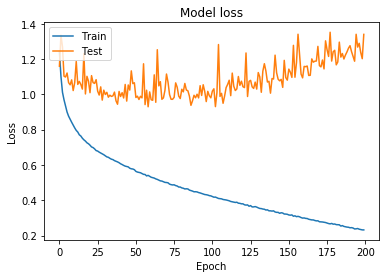

In [9]:
# Plot training & validation loss values
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()